<h1> <strong>Processo Seletivo Cientista de Dados Jr. - Antonio Augusto Pilan dos Santos</strong> </h1>

<h2>Contextualização do problema</h2>

<h3>Can you present to me the main factors that point to a possible failure in this system?</h3>

O fato do custo com a manutenção de sistemas de ar ter aumentado com o passar dos anos pode indicar que, conforme o passar dos anos e o envelhecer dos caminhões, estão precisando ocorrer manutenções que se encaixam no diagnóstico de $10 ou $25. 

O aumento desse custo para uma mesma frota pode indicar o aumento de defeitos mais graves, entrando no caso de $500. Portanto, é preciso identificar a necessidade de reparos antes que cheguemos nesse ponto.

<h3>Can we reduce our expenses with this type of maintenance using AI techniques?</h3>

Sim! podemos modelar um sistema que identifica possíveis necessidades de manutenção antes de chegar ao ponto de custar $500 usando Machine Learning. Assim, quando nosso algoritmo apitar, é sinal de que uma manutenção precisa ser feita antes de acontecer uma pane geral no caminhão

<hr>
<h2>Código e estudo do Modelo:</h2>

Primeiro, vamos às importações de bibliotecas e ajustes de padrões usados no projeto:

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from IPython.display import HTML, display
import io

In [77]:
def capture_df_info(df):
    buffer = io.StringIO()
    df.info(verbose=True, buf=buffer, show_counts=True)
    return buffer.getvalue()

html_template = """
<div style="display: inline-block; padding-right: 20px;">
    <button type="button" onclick="this.nextElementSibling.style.display=this.nextElementSibling.style.display=='none'?'block':'none';">Toggle df_present Info</button>
    <div style="display: none;"><pre>{}</pre></div>
</div>
<div style="display: inline-block;">
    <button type="button" onclick="this.nextElementSibling.style.display=this.nextElementSibling.style.display=='none'?'block':'none';">Toggle df_previous Info</button>
    <div style="display: none;"><pre>{}</pre></div>
</div>
"""

Importando os dados,vamos fazer um encoding da nossa variável target para 0: neg e 1:pos para facilitar nossos processos operacionais e trabalhar como uma classificação binária

In [78]:
df_present = pd.read_csv("air_system_present_year.csv")
df_previous = pd.read_csv("air_system_previous_years.csv")

df_present['class'] = df_present['class'].map({'neg': 0, 'pos': 1})
df_previous['class'] = df_previous['class'].map({'neg': 0, 'pos': 1})

display(df_present)
display(df_previous)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,0,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,0,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,0,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,0,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,0,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,0,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [79]:
df_previous['class'].value_counts(normalize=True)

class
0    0.983333
1    0.016667
Name: proportion, dtype: float64

Vemos, então, que os reparos no sistema de ar são muito raros, presentes em apenas 1.66% dos reparos. Assim, temos em mente que estamos trabalhando com dados não balanceados.

<h3>1) Exploração e limpeza dos dados</h3>

<h4>1.1) Entendendo os tipos de dados</h4>

In [80]:
info_df_1 = capture_df_info(df_present)
info_df_2 = capture_df_info(df_previous)

html_content = html_template.format(info_df_1, info_df_2)

display(HTML(html_content))
#Veja as infos ao clicar nos botões
print(df_present.columns)
print(df_previous.columns)

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)
Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)


Percebemos que o os dataframes não tem valores nulos, portantos os valores na estão inseridos como string e precisamos que ele seja o objeto numpy NaN para serem tratados corretamente

In [81]:
df_previous.replace("na", np.nan, inplace=True)
df_present.replace("na", np.nan, inplace=True)
info_df_1 = capture_df_info(df_present)
info_df_2 = capture_df_info(df_previous)

html_content = html_template.format(info_df_1, info_df_2)

display(HTML(html_content))

Outra observação é que temos colunas numéricas, porém, no schema eles estão como strings. Precisamos padronizar nossos dados de maneira a trabalhar com números e podermos estudar a estatística de cada um deles

<h4>1.2) Ajustando tipos</h4>

In [82]:
columns_to_convert = df_previous.columns.difference(['class'])

df_previous[columns_to_convert] = df_previous[columns_to_convert].apply(pd.to_numeric, errors='coerce')
display(df_previous)
display(df_previous.describe())

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,0.128020,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


<h4>1.3) Lidando com dados faltantes</h4>

Um ponto muito importante é: como lidar com dados faltantes?

Para isso, vamos analisar nossos dados e definir o que pode ser feito para lidar com esses dados

In [83]:
df_previous.isna().sum().sort_values(ascending=True)

class         0
aa_000        0
bt_000      167
ck_000      338
cj_000      338
          ...  
cr_000    46329
bo_000    46333
bp_000    47740
bq_000    48722
br_000    49264
Length: 171, dtype: int64

In [84]:
display(df_previous.dropna())
print(df_previous.isna().sum().sum())
print(df_previous.size)
print((df_previous.isna().sum().sum()/df_previous.size)*100)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,0,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,0,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,0,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,1,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,1,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,0,118028,0.0,740.0,714.0,618.0,690.0,0.0,0.0,0.0,...,838952.0,631338.0,541036.0,1285274.0,1832658.0,165838.0,3022.0,0.0,0.0,0.0
59562,0,229916,0.0,616.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59843,0,224084,0.0,912.0,766.0,0.0,0.0,0.0,0.0,0.0,...,413576.0,209524.0,469894.0,2233992.0,5933084.0,364450.0,12422.0,0.0,0.0,0.0
59870,0,197332,0.0,658.0,616.0,216.0,346.0,0.0,0.0,0.0,...,73940.0,49896.0,90454.0,575264.0,104600.0,10352.0,36.0,0.0,0.0,0.0


850015
10260000
8.284746588693958


Vemos que o desvio padrão é muito alto, portanto, não é interessante substituir esses valores pela média daquela coluna. 

Como temos conhecimento de negócio, poderíamos usar o valor 0 para dados faltantes, visto que assumimos que 0 é o valor para um caminhão que não fez determinado trajeto.

Se simplesmente apagarmos as linhas com NaN, perdemos a maior parte dos nossos dados.
Preenchendo com 0, iríamos assumir o valor de cerca de 8.28% da nossa base de dados.

Tendo em vista essas métricas, decidi preencher os valores faltantes com 0 para manter o volume de dados em detrimento de um pouco da qualidade deles

In [85]:
df_previous = df_previous.fillna(0)
df_present[columns_to_convert] = df_present[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0)

display(df_previous)
display(df_present)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


<h3>2) Ajustando Features</h3>

Para evitar qualquer tipo de enviesamento dos modelos devido à magnetude de cada valor e feature, vamos padronizar nossos dados usando Z-Score
\begin{equation}
    z = \frac{x-\mu}{\sigma}
\end{equation}

In [86]:
columns_to_convert_aftercleaning = df_previous.columns.difference(['class'])
df_previous_target = df_previous["class"]
df_previous = df_previous[columns_to_convert_aftercleaning]

for col in df_previous.columns:
    df_previous[col] = (df_previous[col] - df_previous[col].mean()) / df_previous[col].std() 
    df_previous = df_previous.rename(columns={str(col):f"{col}_std"})
    
df_present_target = df_present["class"]
df_present = df_present[columns_to_convert]

for col in df_present.columns:
    df_present[col] = (df_present[col] - df_present[col].mean()) / df_present[col].std() 
    df_present = df_present.rename(columns={str(col):f"{col}_std"})
    
display(df_previous)
display(df_present)

,aa_000_std,ab_000_std,ac_000_std,ad_000_std,ae_000_std,af_000_std,ag_000_std,ag_001_std,ag_002_std,ag_003_std,...,ee_002_std,ee_003_std,ee_004_std,ee_005_std,ee_006_std,ee_007_std,ee_008_std,ee_009_std,ef_000_std,eg_000_std
0,0.119380,-0.096307,2.310205,-0.004084,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,0.695654,0.526362,0.241070,0.071940,0.009234,-0.107312,-0.143002,-0.175697,-0.020257,-0.023540
1,-0.180695,-0.096307,-0.432855,-0.004092,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,-0.016615,-0.056778,-0.126810,-0.129199,-0.183954,-0.152005,-0.088551,-0.143926,-0.020257,-0.023540
2,-0.125810,-0.096307,-0.432855,-0.004089,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,-0.141850,-0.090532,-0.014412,0.017950,-0.008073,-0.107274,-0.094025,-0.164810,-0.020257,-0.023540
3,-0.407925,-0.096307,-0.432855,-0.004090,-0.041322,-0.002669,-0.010762,-0.028369,-0.056928,-0.115222,...,-0.382837,-0.385997,-0.379022,-0.349159,-0.309590,-0.199214,-0.306731,-0.175697,0.916825,3.685297
4,0.010572,-0.096307,-0.432854,-0.004079,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,0.157828,0.038882,-0.030490,-0.037966,-0.039840,-0.017943,0.663590,-0.149899,-0.020257,-0.023540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.644059,-0.096307,-0.432854,-0.004087,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.112257,...,0.485205,0.662290,0.730750,0.742880,0.649062,0.218393,1.702631,0.429821,-0.020257,-0.023540
59996,-0.392288,-0.096307,2.310205,-0.004086,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,-0.373847,-0.373580,-0.360902,-0.287861,-0.309471,-0.199214,-0.306731,-0.175697,-0.020257,-0.023540
59997,-0.407237,-0.096307,2.310205,-0.004092,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,-0.382357,-0.385368,-0.378683,-0.349069,-0.309462,-0.197688,-0.306731,-0.175697,-0.020257,-0.023540
59998,0.144093,-0.096307,2.310205,-0.004078,-0.041322,-0.051358,-0.010762,-0.028369,-0.056928,-0.115642,...,0.225079,0.025685,-0.080305,-0.146851,-0.126810,-0.103173,1.487166,8.051406,-0.020257,-0.023540


,aa_000_std,ab_000_std,ac_000_std,ad_000_std,ae_000_std,af_000_std,ag_000_std,ag_001_std,ag_002_std,ag_003_std,...,ee_002_std,ee_003_std,ee_004_std,ee_005_std,ee_006_std,ee_007_std,ee_008_std,ee_009_std,ef_000_std,eg_000_std
0,-0.134920,-0.137534,-0.433680,-0.234293,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,-0.106502,...,-0.366980,-0.376656,-0.367219,-0.335165,-0.294709,-0.214973,-0.267026,-0.159617,-0.018788,-0.016517
1,-0.134876,-0.137534,-0.433680,-0.213673,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,-0.109132,...,-0.367004,-0.376418,-0.366261,-0.335595,-0.294703,-0.214742,-0.267026,-0.159617,-0.018788,-0.016517
2,-0.003962,1.429804,-0.433679,-0.160650,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,0.086473,...,0.028624,0.279069,-0.018498,-0.120531,0.807549,-0.120117,-0.266059,-0.159617,-0.018788,-0.016517
3,-0.016247,-0.137534,-0.433678,0.446170,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,-0.109132,...,0.065258,0.042637,0.015736,0.051699,0.066828,-0.085288,0.260606,-0.098621,-0.018788,-0.016517
4,-0.131437,-0.137534,-0.433680,-0.140030,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,-0.109132,...,-0.361736,-0.369748,-0.352902,-0.295952,-0.292113,-0.214730,-0.266884,-0.159617,-0.018788,-0.016517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.027516,-0.137534,2.305708,0.413767,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,-0.109132,...,0.138807,0.094325,0.037190,-0.037230,-0.001520,-0.018733,1.531368,0.322879,-0.018788,-0.016517
15996,-0.135004,-0.137534,-0.433680,-0.209254,0.015991,0.099273,-0.018613,-0.022989,-0.058134,-0.109132,...,-0.367646,-0.376818,-0.367510,-0.335676,-0.294773,-0.215028,-0.267026,-0.159617,-0.018788,-0.016517
15997,0.023115,-0.137534,-0.433678,0.874774,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,-0.109132,...,0.278294,0.399087,0.250101,0.128506,0.019988,-0.077388,0.405358,0.209304,-0.018788,-0.016517
15998,-0.134821,-0.137534,-0.433680,-0.219564,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,-0.109132,...,-0.367388,-0.376532,-0.367403,-0.335253,-0.293933,-0.214201,-0.266887,-0.159617,-0.018788,-0.016517


<h3>3) Criando modelos e validando</h3>

A acurácia não é uma boa métrica por estarmos avaliando o total de acertos num todo. Como estamos trabalhando com um conjunto de dados desbalanceado, é uma métrica enviesada porque a maior a parte dos dados é neg(ou 0). Se a máquina chutar tudo como 0 ela ira acertar 98.3% dos casos no conjunto de treinamentos. Recall e Precision são métricas normalizadas então são muito melhores, porém, como queremos otimizar custo, iremos criar uma métrica personalizada para inferir o custo nas seguintes situações:

- Um caminhão que foi ao reparo custa $25, seremos conservadores e estimaremos o custo máximo dos reparos
- Um caminhão que não foi ao reparo e precisava (Falso Negativo) custa $500

In [87]:
def cost_metric(y_true, y_pred, fp_cost=25, fn_cost=500):
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    return fp * fp_cost + fn * fn_cost

cost_scorer = make_scorer(cost_metric, greater_is_better=False)

Agora que definido nossa métrica de resultado, vamos para criação de modelos:

<h4>3.1) Decision Trees</h4>

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=2, min_samples_split=2;, score=-136225.000 total time=   0.6s
[CV 2/3] END max_depth=2, min_samples_split=2;, score=-126225.000 total time=   0.6s
[CV 3/3] END max_depth=2, min_samples_split=2;, score=-122425.000 total time=   0.6s
[CV 1/3] END max_depth=2, min_samples_split=4;, score=-136225.000 total time=   0.6s
[CV 2/3] END max_depth=2, min_samples_split=4;, score=-126225.000 total time=   0.6s
[CV 3/3] END max_depth=2, min_samples_split=4;, score=-122425.000 total time=   0.7s
[CV 1/3] END max_depth=2, min_samples_split=6;, score=-136225.000 total time=   0.6s
[CV 2/3] END max_depth=2, min_samples_split=6;, score=-126225.000 total time=   0.6s
[CV 3/3] END max_depth=2, min_samples_split=6;, score=-122425.000 total time=   0.6s
[CV 1/3] END max_depth=5, min_samples_split=2;, score=-68700.000 total time=   1.5s
[CV 2/3] END max_depth=5, min_samples_split=2;, score=-73725.000 total time=   1.6s
[CV 3/3

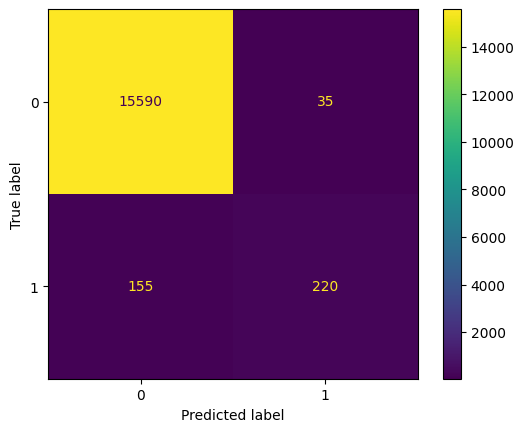

In [88]:
model = DecisionTreeClassifier()
model.fit(df_previous,df_previous_target)

param_grid = {
    'min_samples_split': [2,4,6],
    'max_depth': [2,5,10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=cost_scorer, cv=3,verbose=3)
grid_search.fit(df_previous, df_previous_target)

best_model_dt = grid_search.best_estimator_
prediction = best_model_dt.predict(df_present)
print(cost_metric(df_present_target,prediction))

conf_matrix = confusion_matrix(df_present_target, prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

<h4>3.2) Random Forest</h4>

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .max_depth=5, n_estimators=20;, score=-89075.000 total time=   1.5s
[CV 2/3] END .max_depth=5, n_estimators=20;, score=-83150.000 total time=   1.6s
[CV 3/3] END .max_depth=5, n_estimators=20;, score=-85200.000 total time=   1.6s
[CV 1/3] END .max_depth=5, n_estimators=50;, score=-84150.000 total time=   3.9s
[CV 2/3] END .max_depth=5, n_estimators=50;, score=-86525.000 total time=   3.9s
[CV 3/3] END .max_depth=5, n_estimators=50;, score=-81075.000 total time=   3.7s
[CV 1/3] END max_depth=10, n_estimators=20;, score=-63250.000 total time=   3.0s
[CV 2/3] END max_depth=10, n_estimators=20;, score=-58775.000 total time=   3.1s
[CV 3/3] END max_depth=10, n_estimators=20;, score=-56225.000 total time=   3.0s
[CV 1/3] END max_depth=10, n_estimators=50;, score=-63225.000 total time=   7.6s
[CV 2/3] END max_depth=10, n_estimators=50;, score=-65275.000 total time=   7.8s
[CV 3/3] END max_depth=10, n_estimators=50;, scor

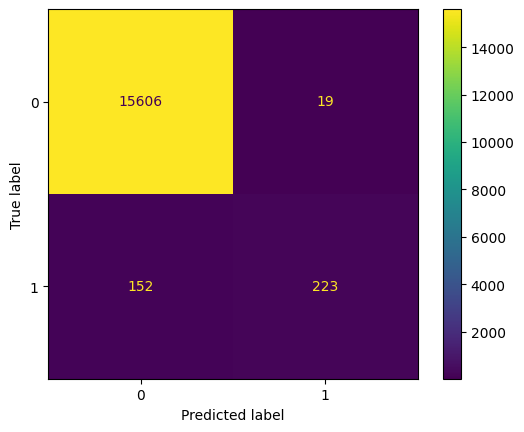

In [89]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [20, 50],
    'max_depth': [5,10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=cost_scorer, cv=3,verbose=3)
grid_search.fit(df_previous, df_previous_target)

best_model_rf = grid_search.best_estimator_
prediction = best_model_rf.predict(df_present)
print(cost_metric(df_present_target,prediction))

conf_matrix = confusion_matrix(df_present_target, prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

<h4>3.3) Extra Trees Classifier</h4>

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ...............n_estimators=1;, score=-75525.000 total time=   0.1s
[CV 2/3] END ...............n_estimators=1;, score=-73275.000 total time=   0.0s
[CV 3/3] END ...............n_estimators=1;, score=-65200.000 total time=   0.1s
[CV 1/3] END ..............n_estimators=30;, score=-56325.000 total time=   0.8s
[CV 2/3] END ..............n_estimators=30;, score=-57300.000 total time=   0.8s
[CV 3/3] END ..............n_estimators=30;, score=-53875.000 total time=   0.9s
[CV 1/3] END ..............n_estimators=50;, score=-60225.000 total time=   1.4s
[CV 2/3] END ..............n_estimators=50;, score=-53250.000 total time=   1.3s
[CV 3/3] END ..............n_estimators=50;, score=-52950.000 total time=   1.4s
[CV 1/3] END .............n_estimators=100;, score=-52775.000 total time=   2.7s
[CV 2/3] END .............n_estimators=100;, score=-57925.000 total time=   2.7s
[CV 3/3] END .............n_estimators=100;, scor

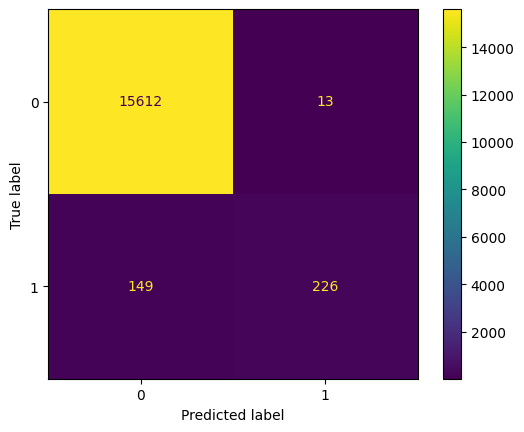

In [90]:
model = ExtraTreesClassifier()

param_grid = {
    'n_estimators': [1, 30,50,100],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=cost_scorer, cv=3,verbose=3)
grid_search.fit(df_previous, df_previous_target)

best_model_et = grid_search.best_estimator_
prediction = best_model_et.predict(df_present)
print(cost_metric(df_present_target,prediction))

conf_matrix = confusion_matrix(df_present_target, prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

<h4>3.4) XGBoost</h4>

Fitting 3 folds for each of 18 candidates, totalling 54 fits
38925


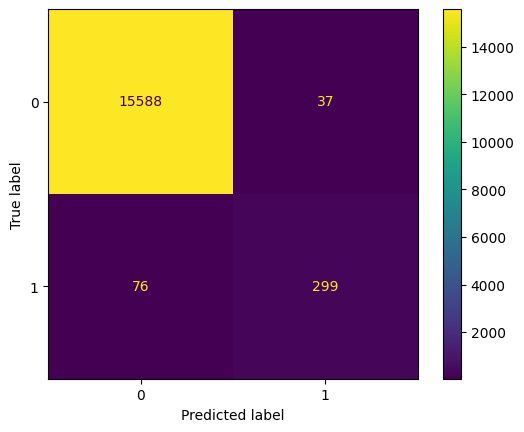

In [91]:
model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 9],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=cost_scorer, cv=3, verbose=1)
grid_search.fit(df_previous, df_previous_target)

best_model_xgb = grid_search.best_estimator_
prediction = best_model_xgb.predict(df_present)
print(cost_metric(df_present_target, prediction))

conf_matrix = confusion_matrix(df_present_target, prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

<h4>3.5) Otimização final XGBoost</h4>

Tivemos, como melhor modelo, o classificador XGBoost e conseguimos avaliar sua matriz de confusão que é relativamente satisfatória. Porem, é muito custoso o cenário $p_{01}$ pelo valor de $500 de manutenção. Modelos normalmente assumem um valor como verdadeiro se ele tiver 50% de certeza daquilo (threshold de 0.5) e, se formos conservadores e assumir que caminhões com threshold baixo devem ir para manutenção podemos diminuir o custo no geral por diminur falsos negativos com o Drawback de aumentar falsos positivos. Como o falso positivo é muito mais barato, podemos testar se vale a pena:

17900


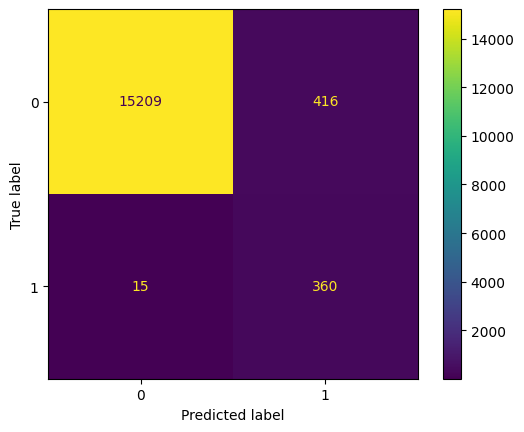

In [92]:
probabilities = best_model_xgb.predict_proba(df_present)[:, 1]
threshold = 0.02 #best threshold to avoid false negative

predictions = (probabilities >= threshold).astype(int)

confusion = confusion_matrix(df_present_target, predictions)
print(cost_metric(df_present_target, predictions))

ConfusionMatrixDisplay.from_predictions(df_present_target, predictions)

Por fim, usando um threshold de 2% conseguimos chegar à um valor baixíssimo de manutenção usando XGBoost, menor até mesmo que os dados de 2016 da empresa, e podemos implementar esse modelo de diferentes formas dependendo do alinhamento com o cliente. Podemos usar Django para montar um data product ou streamlit para monitoramento da gerência. É possível também simplesmente mandar um email automatizado para gerência sempre que o algoritmo identificar que um caminhão precisa de manutenção.

Uma vez com o modelo pronto, as aplicações são infinitas.

<h4>3.6) Feature importance</h4>

Por fim, abaixo podemos ver a importância da 20 principais features pro modelo utilizado

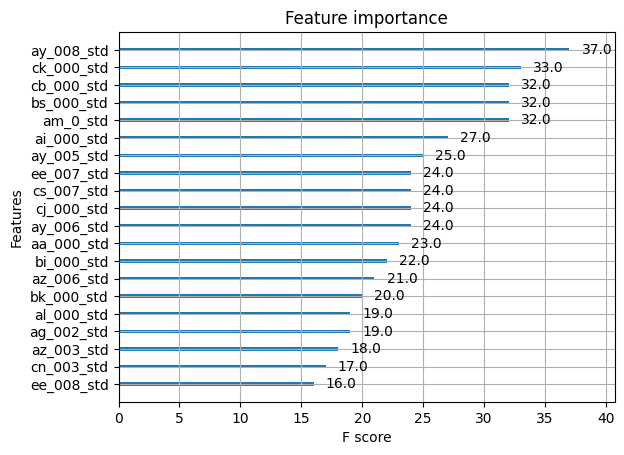

In [97]:
xgb.plot_importance(best_model_xgb, max_num_features=20)
plt.show()